![](escudo.png)
## Proyecto COVID-19
### Docente:
### Jose Gabriel Rodriguez Rivas
### Alumnos:
###  Francisco Javier Favela Najera
### Jorge Alberto Hernandez Castro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
plt.style.use('fivethirtyeight')

In [2]:
df_virus=pd.read_csv('200807COVID19MEXICO.csv', encoding = "ISO-8859-1")
#df_entidades=pd.read_csv('ENTIDADES.csv', encoding = "ISO-8859-1")
df_virus.shape[0]

1071706

In [3]:
df_virus.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-07,0f9404,2,3,25,1,11,25,6,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1,2020-08-07,07b035,2,4,1,1,1,1,1,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-08-07,08c8fb,2,4,9,2,9,9,2,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-07,1a59f9,2,3,27,1,27,27,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,2020-08-07,023a88,2,4,26,1,25,26,55,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2


In [4]:
df_virus.drop(['HABLA_LENGUA_INDIG','ENTIDAD_UM','FECHA_ACTUALIZACION','ID_REGISTRO','ENTIDAD_NAC','MIGRANTE',
               'PAIS_NACIONALIDAD','PAIS_ORIGEN','INTUBADO','UCI','OTRO_CASO'],axis=1,inplace=True)

In [5]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,25,6,2,2020-06-09,2020-06-06,2020-06-16,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,1,1,1,2020-04-23,2020-04-13,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,9,2,2,2020-04-29,2020-04-22,2020-05-03,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,27,4,1,2020-06-25,2020-06-20,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,26,55,2,2020-03-30,2020-03-27,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [6]:
casos_positivos = df_virus=df_virus.loc[df_virus['RESULTADO'] == 1]

In [7]:
df_resultado_prueba = df_virus.groupby(['RESULTADO']).size().reset_index(name='Total')
df_resultado_prueba['RESULTADO'] = df_resultado_prueba['RESULTADO'].apply(lambda toLabel: 'POSITIVO' if toLabel==1 else
                                                                         'NEGATIVO' if toLabel ==2 else 'EN PROCESO')
df_resultado_prueba

,RESULTADO,Total
0,POSITIVO,469407


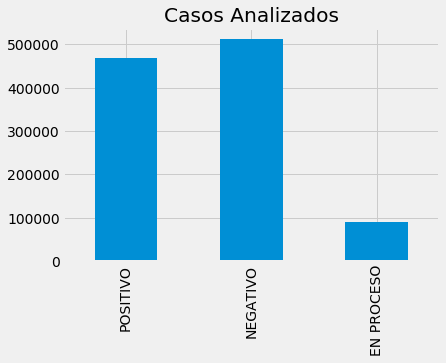

In [8]:
TotalR = pd.Series({'POSITIVO': 469407,
                      'NEGATIVO': 513144,
                      'EN PROCESO': 89155})
TotalR.plot(kind='bar', title='Casos Analizados')

In [9]:
Genero = casos_positivos['SEXO'].value_counts()
Genero

2    248893
1    220514
Name: SEXO, dtype: int64

In [10]:
porcentaje_genero = [100/469407*n for n in Genero]
print(porcentaje_genero)

[53.022856497666204, 46.977143502333796]


Text(0.5, 1.0, 'Porcentaje de hombres y mujeres positivos')

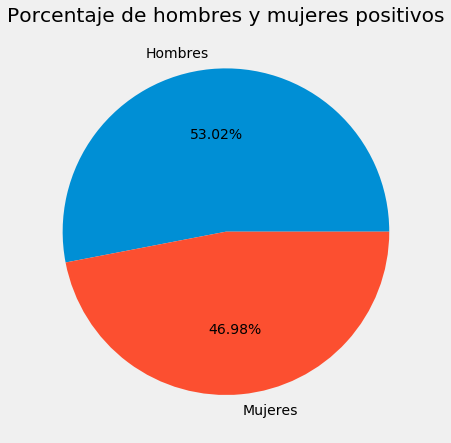

In [11]:
fig, ax = plt.subplots(1, figsize=(20, 7))

labels_genero = 'Hombres', 'Mujeres'

ax.pie(porcentaje_genero, labels=labels_genero, autopct='%1.2f%%')
ax.set_title('Porcentaje de hombres y mujeres positivos')

## Enfermedades

### Neumonia, Asma y Epoc

In [12]:
neumonia = casos_positivos['NEUMONIA'].value_counts()
neumonia

2     374127
1      95275
99         5
Name: NEUMONIA, dtype: int64

In [13]:
porcentaje_neumo = [100/469407*n for n in neumonia]
print(porcentaje_neumo)

[79.70204960727045, 20.296885219010367, 0.0010651737191818614]


In [14]:
asma = casos_positivos['ASMA'].value_counts()
asma

2     455563
1      12512
98      1332
Name: ASMA, dtype: int64

In [15]:
porcentaje_asma = [100/469407*n for n in asma]
print(porcentaje_asma)

[97.05074700632926, 2.66549071488069, 0.28376227879004784]


In [16]:
epoc = casos_positivos['EPOC'].value_counts()
epoc

2     460769
1       7299
98      1339
Name: EPOC, dtype: int64

In [17]:
porcentaje_epoc = [100/469407*n for n in epoc]
print(porcentaje_epoc)

[98.15980588274141, 1.5549405952616813, 0.28525352199690246]


Text(0.5, 1.0, 'EPOC')

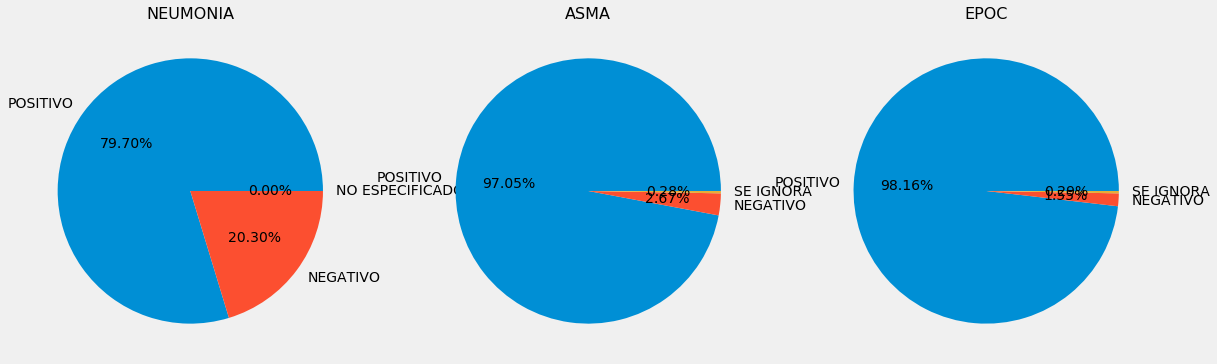

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 15))

label_neumo = 'POSITIVO', 'NEGATIVO','NO ESPECIFICADO'
label_asma = 'POSITIVO', 'NEGATIVO','SE IGNORA'
label_epoc = 'POSITIVO','NEGATIVO','SE IGNORA'

ax[0].pie(porcentaje_neumo, labels=label_neumo, autopct='%1.2f%%') 
ax[0].set_title('NEUMONIA', fontsize=16)

ax[1].pie(porcentaje_asma, labels=label_asma, autopct='%1.2f%%')
ax[1].set_title('ASMA', fontsize=16)

ax[2].pie(porcentaje_epoc, labels=label_epoc, autopct='%1.2f%%')
ax[2].set_title('EPOC', fontsize=16)

### Obesidad y Diabetes

In [19]:
obesidad = casos_positivos['OBESIDAD'].value_counts()
obesidad

2     380164
1      87864
98      1379
Name: OBESIDAD, dtype: int64

In [20]:
porcentaje_obesidad = [100/469407*n for n in obesidad]
print(porcentaje_obesidad)

[80.98814035581063, 18.718084732439014, 0.29377491175035736]


In [21]:
diabetes = casos_positivos['DIABETES'].value_counts()
diabetes

2     393024
1      74881
98      1502
Name: DIABETES, dtype: int64

In [22]:
porcentaje_diabetes = [100/469407*n for n in diabetes]
print(porcentaje_diabetes)

[83.72776716154637, 15.95225465321139, 0.31997818524223115]


Text(0.5, 1.0, 'DIABETES')

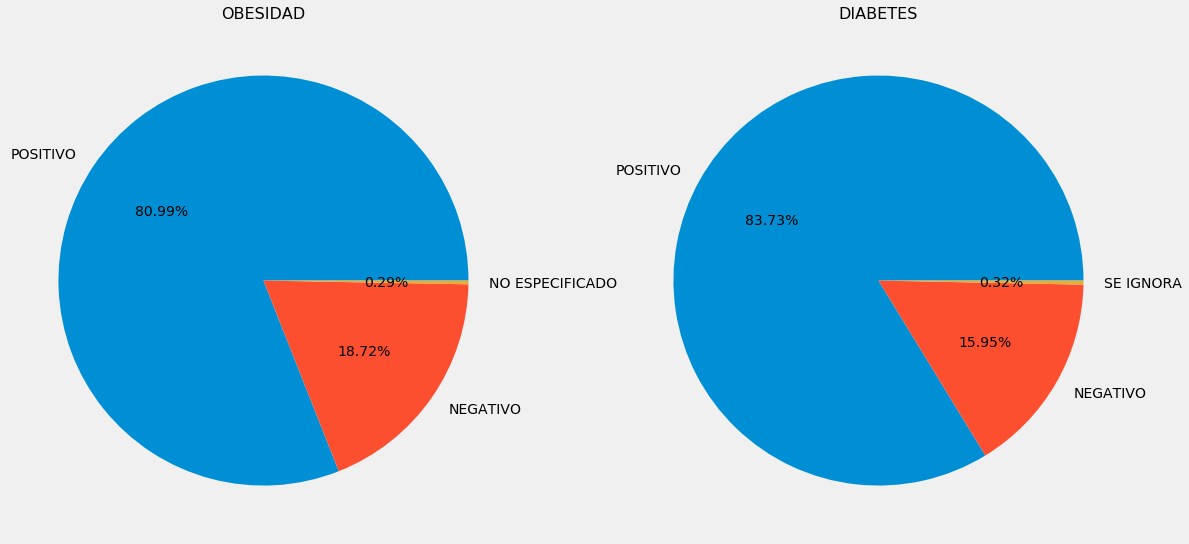

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18, 15))

label_obe = 'POSITIVO', 'NEGATIVO','SE IGNORA'
label_dia = 'POSITIVO', 'NEGATIVO','SE IGNORA'

ax[0].pie(porcentaje_obesidad, labels=label_neumo, autopct='%1.2f%%') 
ax[0].set_title('OBESIDAD', fontsize=16)

ax[1].pie(porcentaje_diabetes, labels=label_asma, autopct='%1.2f%%')
ax[1].set_title('DIABETES', fontsize=16)

In [24]:
#df_virus["Defuncion"] = df_virus.apply(lambda x: "0" if (x["FECHA_DEF"]) == '9999-99-99' else "1", axis=1)
#df_virus.head()

## Entidades

In [25]:
entidades={
1:'Aguascalientes',
2:'Baja California',
3:'Baja California Sur',
4:'Campeche',
5:'Coahuila',
6:'Colima',
7:'Chiapas',
8:'Chihuahua',
9:'Ciudad De Mexico',
10:'Durango',
11:'Guanajuato',
12:'Guerrero',
13:'Hidalgo',
14:'Jalisco',
15:'Mexico',
16:'Michoacan',
17:'Morelos',
18:'Nayarit',
19:'Nuevoleon',
20:'Oaxaca',
21:'Puebla',
22:'Queretaro',
23:'Quintana Roo',
24:'Sanluispotosi',
25:'Sinaloa',
26:'Sonora',
27:'Tabasco',
28:'Tamaulipas',
29:'Tlaxcala',
30:'Veracruz',
31:'Yucatan',
32:'Zacatecas',
36:'Estados Unidos Mexicanos',
97:'No Aplica',
98:'Se Ignora',
99:'No Especificado'}

df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,25,6,2,2020-06-09,2020-06-06,2020-06-16,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,1,1,1,2020-04-23,2020-04-13,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,9,2,2,2020-04-29,2020-04-22,2020-05-03,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,27,4,1,2020-06-25,2020-06-20,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,26,55,2,2020-03-30,2020-03-27,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [26]:
entidades

{1: 'Aguascalientes',
 2: 'Baja California',
 3: 'Baja California Sur',
 4: 'Campeche',
 5: 'Coahuila',
 6: 'Colima',
 7: 'Chiapas',
 8: 'Chihuahua',
 9: 'Ciudad De Mexico',
 10: 'Durango',
 11: 'Guanajuato',
 12: 'Guerrero',
 13: 'Hidalgo',
 14: 'Jalisco',
 15: 'Mexico',
 16: 'Michoacan',
 17: 'Morelos',
 18: 'Nayarit',
 19: 'Nuevoleon',
 20: 'Oaxaca',
 21: 'Puebla',
 22: 'Queretaro',
 23: 'Quintana Roo',
 24: 'Sanluispotosi',
 25: 'Sinaloa',
 26: 'Sonora',
 27: 'Tabasco',
 28: 'Tamaulipas',
 29: 'Tlaxcala',
 30: 'Veracruz',
 31: 'Yucatan',
 32: 'Zacatecas',
 36: 'Estados Unidos Mexicanos',
 97: 'No Aplica',
 98: 'Se Ignora',
 99: 'No Especificado'}

In [27]:
df_virus['ENTIDAD_RES'] =df_virus['ENTIDAD_RES'].map(entidades)

In [28]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,Sinaloa,6,2,2020-06-09,2020-06-06,2020-06-16,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,Aguascalientes,1,1,2020-04-23,2020-04-13,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,Ciudad De Mexico,2,2,2020-04-29,2020-04-22,2020-05-03,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,Tabasco,4,1,2020-06-25,2020-06-20,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,Sonora,55,2,2020-03-30,2020-03-27,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


## Infectados y Muertes por Edad

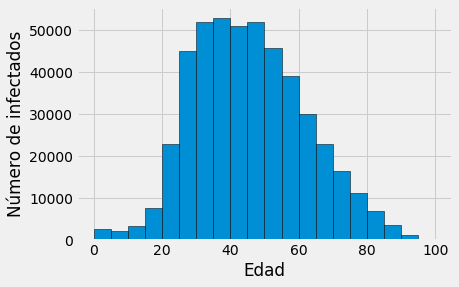

In [29]:
df_edad=df_virus.loc[df_virus['RESULTADO'] == 1]
plt.hist(df_edad['EDAD'], bins=20, range=(0,100), histtype='bar', ec='black')
plt.xlabel('Edad')
plt.ylabel('Número de infectados')
plt.show()

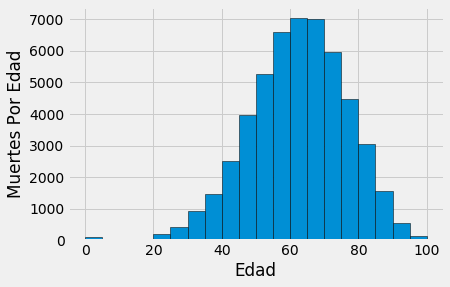

In [30]:
df_edad= df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
plt.hist(df_edad['EDAD'], bins=20, range=(0,100), histtype='bar', ec='black')
plt.xlabel('Edad')
plt.ylabel('Muertes Por Edad')
plt.show()

## % Entidades con contagios

In [31]:
ENTIDAD_INFECTADOS=df_virus.loc[(df_virus['RESULTADO'] == 1)]
ENTIDAD_INFECTADOS=ENTIDAD_INFECTADOS['ENTIDAD_RES'].value_counts()

(-1.1011477051629806,
 1.1000546527604176,
 -1.1007304162969407,
 1.108336486536686)

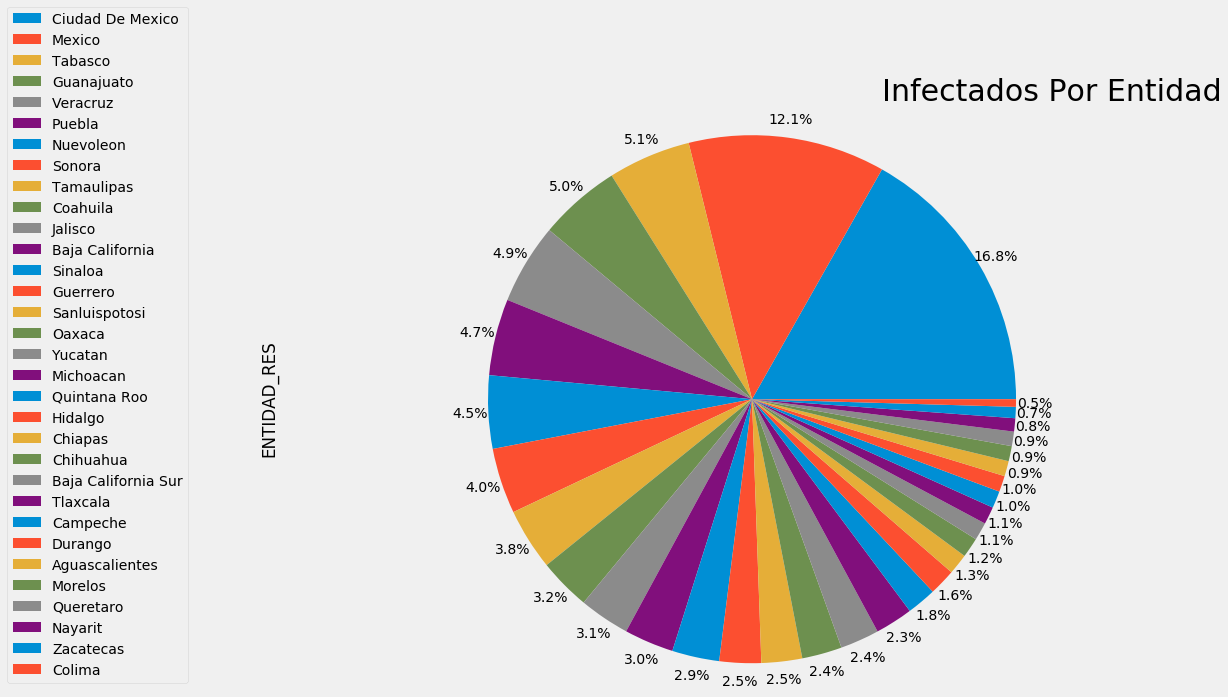

In [32]:
ENTIDAD_INFECTADOS.plot(kind='pie',shadow=None,autopct='%1.1f%%',figsize=(15,10),labels=None,pctdistance=1.07)
plt.title('Infectados Por Entidad',loc="right",fontsize='30')
plt.legend(labels=ENTIDAD_INFECTADOS.index,loc='lower left',bbox_to_anchor=(-0.3, 0., 0.5, 0.5))
plt.axis('equal')

In [33]:
ENTIDAD_DEFUNCIONES=df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
ENTIDAD_DEFUNCIONES=ENTIDAD_DEFUNCIONES['ENTIDAD_RES'].value_counts()

(-1.1009182532450204,
 1.1000437266587821,
 -1.10058806932925,
 1.1068423076966156)

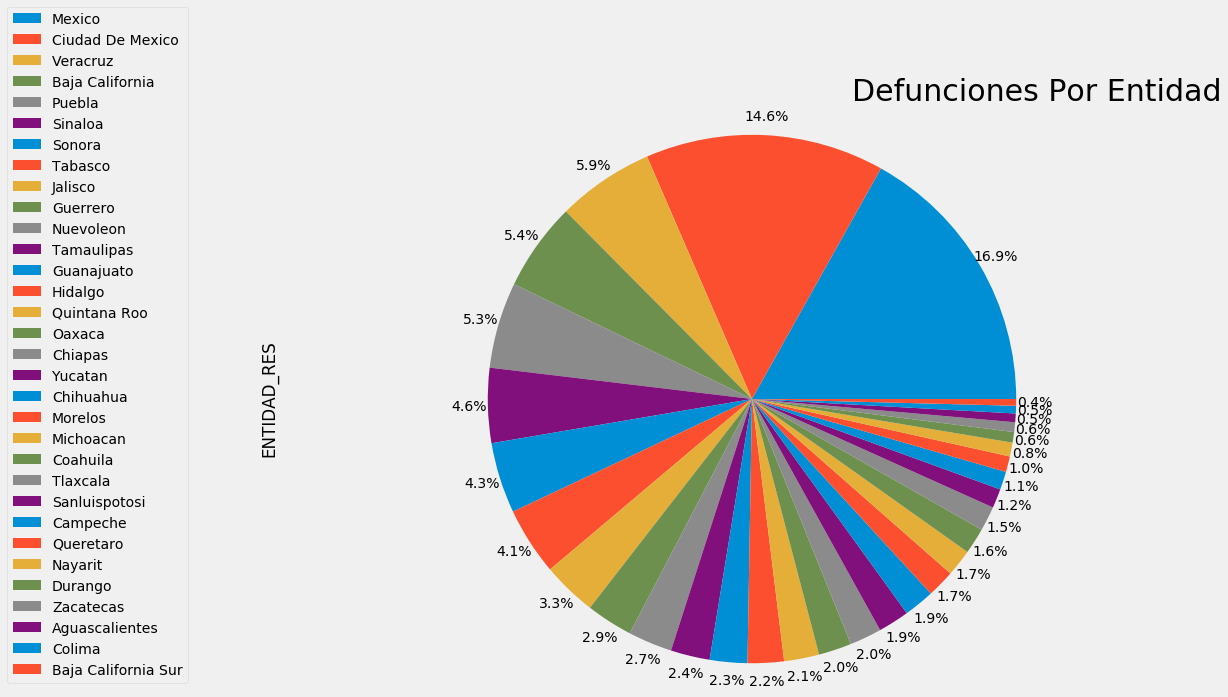

In [34]:
ENTIDAD_DEFUNCIONES.plot(kind='pie',shadow=None,autopct='%1.1f%%',figsize=(15,10),labels=None,pctdistance=1.07)
plt.title('Defunciones Por Entidad',loc="right",fontsize='30')
plt.legend(labels=ENTIDAD_DEFUNCIONES.index,loc='lower left',bbox_to_anchor=(-0.3, 0., 0.5, 0.5))
plt.axis('equal')

In [35]:
positivos = df_virus.loc[df_virus['RESULTADO'] == 1]
muertes = df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
estados=df_virus.groupby(['ENTIDAD_RES'])
estados=estados['ENTIDAD_RES']
estados.head()
positivos.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,Sinaloa,6,2,2020-06-09,2020-06-06,2020-06-16,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,Aguascalientes,1,1,2020-04-23,2020-04-13,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,Ciudad De Mexico,2,2,2020-04-29,2020-04-22,2020-05-03,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,Tabasco,4,1,2020-06-25,2020-06-20,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,Sonora,55,2,2020-03-30,2020-03-27,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


# Sectores de salud

In [36]:
sectores={
1:'CRUZ ROJA',
2:'DIF',
3:'ESTATAL',
4:'IMSS',
5:'IMSS-BIENESTAR',
6:'ISSSTE',
7:'MUNICIPAL',
8:'PEMEX',
9:'PRIVADA',
10:'SEDENA',
11:'SEMAR',
12:'SSA',
13:'UNIVERSITARIO',
99:'NO ESPECIFICADO'}
sectores

{1: 'CRUZ ROJA',
 2: 'DIF',
 3: 'ESTATAL',
 4: 'IMSS',
 5: 'IMSS-BIENESTAR',
 6: 'ISSSTE',
 7: 'MUNICIPAL',
 8: 'PEMEX',
 9: 'PRIVADA',
 10: 'SEDENA',
 11: 'SEMAR',
 12: 'SSA',
 13: 'UNIVERSITARIO',
 99: 'NO ESPECIFICADO'}

In [37]:
df_virus['SECTOR'] =df_virus['SECTOR'].map(sectores)

In [38]:
SECTOR_INFECTADOS=df_virus.loc[(df_virus['RESULTADO'] == 1)]
SECTOR_INFECTADOS=SECTOR_INFECTADOS['SECTOR'].value_counts()
SECTOR_INFECTADOS.head()

SSA        257392
IMSS       150156
ISSSTE      20503
PRIVADA     14214
ESTATAL     10384
Name: SECTOR, dtype: int64

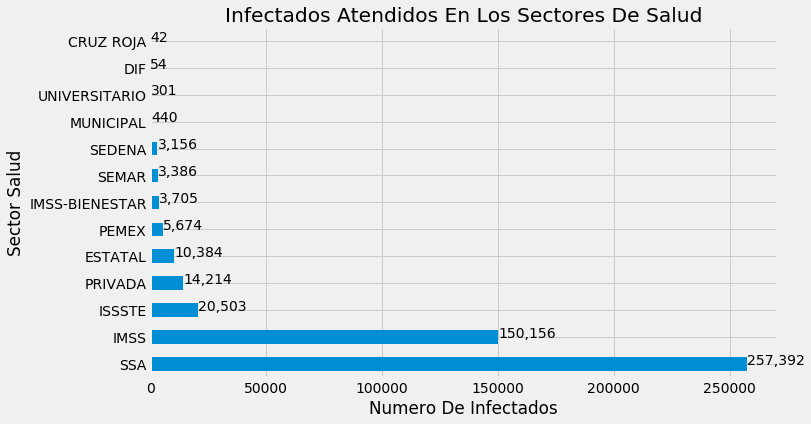

In [39]:
SECTOR_INFECTADOS.plot(kind='barh',figsize=(10,6))
plt.ylabel('Sector Salud')
plt.xlabel('Numero De Infectados')
plt.title('Infectados Atendidos En Los Sectores De Salud')
for index,value in enumerate(SECTOR_INFECTADOS):
    label=format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')
plt.show()

In [40]:
SECTOR_DEFUNCIONES=df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
SECTOR_DEFUNCIONES=SECTOR_DEFUNCIONES['SECTOR'].value_counts()
SECTOR_DEFUNCIONES.head()

IMSS       28489
SSA        15520
ISSSTE      3557
ESTATAL     1225
PEMEX        842
Name: SECTOR, dtype: int64

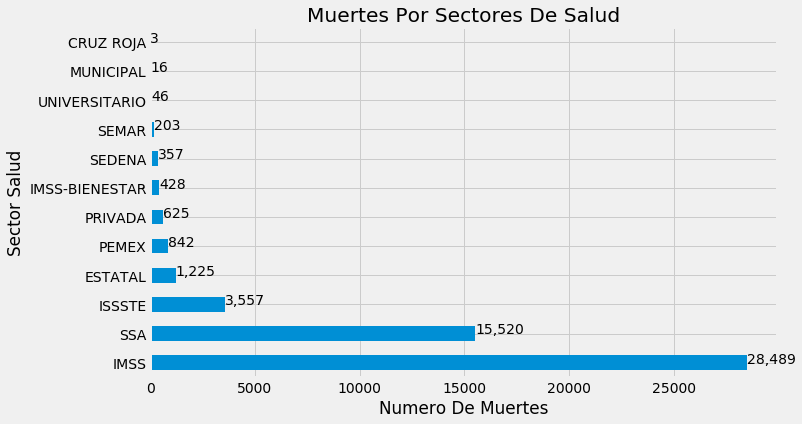

In [41]:
SECTOR_DEFUNCIONES.plot(kind='barh',figsize=(10,6))
plt.ylabel('Sector Salud')
plt.xlabel('Numero De Muertes')
plt.title('Muertes Por Sectores De Salud')
for index,value in enumerate(SECTOR_DEFUNCIONES):
    label=format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')
plt.show()

In [42]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,ESTATAL,1,Sinaloa,6,2,2020-06-09,2020-06-06,2020-06-16,1,...,2,2,2,2,2,2,2,2,2,1
1,2,IMSS,1,Aguascalientes,1,1,2020-04-23,2020-04-13,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,IMSS,2,Ciudad De Mexico,2,2,2020-04-29,2020-04-22,2020-05-03,1,...,2,2,2,1,2,2,2,2,2,1
3,2,ESTATAL,1,Tabasco,4,1,2020-06-25,2020-06-20,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,IMSS,1,Sonora,55,2,2020-03-30,2020-03-27,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


# Mapa de México

In [43]:
mexico_geo=r'estados.json'

In [44]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,ESTATAL,1,Sinaloa,6,2,2020-06-09,2020-06-06,2020-06-16,1,...,2,2,2,2,2,2,2,2,2,1
1,2,IMSS,1,Aguascalientes,1,1,2020-04-23,2020-04-13,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,IMSS,2,Ciudad De Mexico,2,2,2020-04-29,2020-04-22,2020-05-03,1,...,2,2,2,1,2,2,2,2,2,1
3,2,ESTATAL,1,Tabasco,4,1,2020-06-25,2020-06-20,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,IMSS,1,Sonora,55,2,2020-03-30,2020-03-27,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [45]:
m = folium.Map(
    location=[24.5627966,-106.5617301],
    tiles='Mapbox Bright',
    zoom_start=5  # Limited levels of zoom for free Mapbox tiles.
)

folium.GeoJson(
    mexico_geo,
    name='geojson'
).add_to(m)
folium.LayerControl().add_to(m)
m

![](Mapa001.png)

In [46]:
df_ENTIDAD_DEFUNCIONES = ENTIDAD_DEFUNCIONES.to_frame().reset_index()
df_ENTIDAD_DEFUNCIONES

,index,ENTIDAD_RES
0,Mexico,8663
1,Ciudad De Mexico,7502
2,Veracruz,3045
3,Baja California,2774
4,Puebla,2699
5,Sinaloa,2346
6,Sonora,2222
7,Tabasco,2129
8,Jalisco,1712
9,Guerrero,1464


In [47]:
df_ENTIDAD_INFECTADOS = ENTIDAD_INFECTADOS.to_frame().reset_index()
df_ENTIDAD_INFECTADOS

,index,ENTIDAD_RES
0,Ciudad De Mexico,78898
1,Mexico,56564
2,Tabasco,23783
3,Guanajuato,23527
4,Veracruz,23131
5,Puebla,21987
6,Nuevoleon,20984
7,Sonora,18835
8,Tamaulipas,17759
9,Coahuila,14913


In [48]:
world_map=folium.Map(location=[24.5627966,-106.5617301],zoom_start=5,tiles='Mapbox Bright')
world_map.choropleth(
geo_data=mexico_geo,
data=df_ENTIDAD_INFECTADOS,
columns=['index','ENTIDAD_RES'],
key_on='properties.state_name',
fill_color='RdPu',
fill_opacity=0.8,
line_opacity=0.2,
legend_name='Infectados Por Estado')
world_map

C:\Users\zombi\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


![](Mapa002.png)

In [49]:
world_map=folium.Map(location=[24.5627966,-106.5617301],zoom_start=5,tiles='Mapbox Bright')
world_map.choropleth(
geo_data=mexico_geo,
data=df_ENTIDAD_DEFUNCIONES,
columns=['index','ENTIDAD_RES'],
key_on='properties.state_name',
fill_color='RdPu',
fill_opacity=0.8,
line_opacity=0.2,
legend_name='Defunciones Por Estado')
world_map

![](Mapa003.png)

In [50]:
#dgo_map= folium.Map(location= [24.035976,-104.640303],
#                        zoom_start=12)
#dgo_map

# Correlacion entre enfermedades y COVID-19

In [51]:
df_correlacion=pd.read_csv('200807COVID19MEXICO.csv', encoding = "ISO-8859-1")

In [52]:
df_correlacion.drop(['EDAD','ORIGEN','SECTOR','SEXO','ENTIDAD_RES','MUNICIPIO_RES','TIPO_PACIENTE','NACIONALIDAD',
                     'FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','OTRA_COM','EMBARAZO','RESULTADO','HABLA_LENGUA_INDIG',
                     'ENTIDAD_UM','FECHA_ACTUALIZACION','ID_REGISTRO','ENTIDAD_NAC','MIGRANTE','PAIS_NACIONALIDAD',
                     'PAIS_ORIGEN','INTUBADO','UCI','OTRO_CASO'],axis=1,inplace=True)


In [53]:
df_correlacion.head()

,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,1,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2
2,1,1,2,2,2,1,2,2,2,2
3,1,2,2,2,2,1,2,2,2,2
4,1,2,2,2,2,1,2,2,2,2


In [54]:
df_correlacion.corr(method ='pearson')

,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
NEUMONIA,1.000000,-0.002239,-0.008882,-0.010490,-0.011396,-0.001300,-0.010349,-0.008460,-0.008357,-0.010443
DIABETES,-0.002239,1.000000,0.832761,0.833724,0.794312,0.839664,0.814643,0.768819,0.812831,0.775478
EPOC,-0.008882,0.832761,1.000000,0.916455,0.870189,0.862923,0.890705,0.834475,0.890196,0.845726
ASMA,-0.010490,0.833724,0.916455,1.000000,0.885571,0.871903,0.901346,0.844543,0.900581,0.855354
INMUSUPR,-0.011396,0.794312,0.870189,0.885571,1.000000,0.838812,0.870565,0.814076,0.868334,0.824757
HIPERTENSION,-0.001300,0.839664,0.862923,0.871903,0.838812,1.000000,0.865778,0.819706,0.862325,0.819206
CARDIOVASCULAR,-0.010349,0.814643,0.890705,0.901346,0.870565,0.865778,1.000000,0.848622,0.910224,0.858062
OBESIDAD,-0.008460,0.768819,0.834475,0.844543,0.814076,0.819706,0.848622,1.000000,0.856688,0.819275
RENAL_CRONICA,-0.008357,0.812831,0.890196,0.900581,0.868334,0.862325,0.910224,0.856688,1.000000,0.867524
TABAQUISMO,-0.010443,0.775478,0.845726,0.855354,0.824757,0.819206,0.858062,0.819275,0.867524,1.000000


In [55]:
NEU = df_correlacion[(df_correlacion.NEUMONIA == 1)]

In [56]:
NEU.corr(method='pearson')

,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
NEUMONIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIABETES,NaN,1.000000,0.783752,0.792952,0.736350,0.833712,0.756663,0.651244,0.764713,0.735762
EPOC,NaN,0.783752,1.000000,0.905213,0.826565,0.818242,0.842124,0.721611,0.854453,0.824161
ASMA,NaN,0.792952,0.905213,1.000000,0.857139,0.829250,0.856261,0.741057,0.875161,0.836790
INMUSUPR,NaN,0.736350,0.826565,0.857139,1.000000,0.775167,0.802996,0.687333,0.817020,0.780944
HIPERTENSION,NaN,0.833712,0.818242,0.829250,0.775167,1.000000,0.801108,0.687512,0.804139,0.770911
CARDIOVASCULAR,NaN,0.756663,0.842124,0.856261,0.802996,0.801108,1.000000,0.722133,0.874069,0.819278
OBESIDAD,NaN,0.651244,0.721611,0.741057,0.687333,0.687512,0.722133,1.000000,0.755355,0.714361
RENAL_CRONICA,NaN,0.764713,0.854453,0.875161,0.817020,0.804139,0.874069,0.755355,1.000000,0.844541
TABAQUISMO,NaN,0.735762,0.824161,0.836790,0.780944,0.770911,0.819278,0.714361,0.844541,1.000000


In [57]:
DIAB = df_correlacion[(df_correlacion.DIABETES == 1)]

In [58]:
DIAB.corr(method='pearson')

,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
NEUMONIA,1.000000,NaN,-0.006498,-0.015873,-0.017688,0.008759,-0.013225,-0.023119,-0.005439,-0.016918
DIABETES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPOC,-0.006498,NaN,1.000000,0.647627,0.514448,0.399063,0.512941,0.324884,0.505569,0.419993
ASMA,-0.015873,NaN,0.647627,1.000000,0.584005,0.464045,0.570653,0.367444,0.580089,0.448162
INMUSUPR,-0.017688,NaN,0.514448,0.584005,1.000000,0.369646,0.459024,0.292823,0.460552,0.367775
HIPERTENSION,0.008759,NaN,0.399063,0.464045,0.369646,1.000000,0.425916,0.323533,0.425226,0.324255
CARDIOVASCULAR,-0.013225,NaN,0.512941,0.570653,0.459024,0.425916,1.000000,0.394312,0.597825,0.469474
OBESIDAD,-0.023119,NaN,0.324884,0.367444,0.292823,0.323533,0.394312,1.000000,0.412931,0.359251
RENAL_CRONICA,-0.005439,NaN,0.505569,0.580089,0.460552,0.425226,0.597825,0.412931,1.000000,0.489408
TABAQUISMO,-0.016918,NaN,0.419993,0.448162,0.367775,0.324255,0.469474,0.359251,0.489408,1.000000


In [59]:
EP = df_correlacion[(df_correlacion.EPOC == 1)]

In [60]:
EP.corr(method='pearson')

,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
NEUMONIA,1.000000,-0.010345,NaN,-0.012384,-0.014683,0.004618,-0.017385,-0.018482,-0.011391,-0.018909
DIABETES,-0.010345,1.000000,NaN,0.433227,0.417548,0.324629,0.442475,0.373997,0.426023,0.393909
EPOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASMA,-0.012384,0.433227,NaN,1.000000,0.597025,0.387319,0.510488,0.444841,0.568323,0.494280
INMUSUPR,-0.014683,0.417548,NaN,0.597025,1.000000,0.426481,0.446341,0.480920,0.468132,0.395367
HIPERTENSION,0.004618,0.324629,NaN,0.387319,0.426481,1.000000,0.376639,0.225665,0.324411,0.275732
CARDIOVASCULAR,-0.017385,0.442475,NaN,0.510488,0.446341,0.376639,1.000000,0.435791,0.544072,0.461251
OBESIDAD,-0.018482,0.373997,NaN,0.444841,0.480920,0.225665,0.435791,1.000000,0.488382,0.387841
RENAL_CRONICA,-0.011391,0.426023,NaN,0.568323,0.468132,0.324411,0.544072,0.488382,1.000000,0.444679
TABAQUISMO,-0.018909,0.393909,NaN,0.494280,0.395367,0.275732,0.461251,0.387841,0.444679,1.000000


In [61]:
import seaborn as sns
NEUMO = NEU[NEU.columns].astype(float)
DIABE = DIAB[DIAB.columns].astype(float)

### NEUMONIA

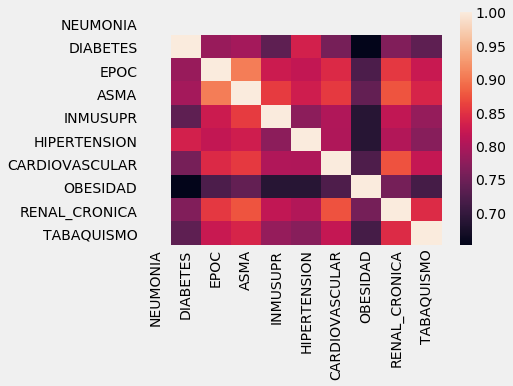

In [62]:
wcorr = NEUMO.corr()
sns.heatmap(wcorr)

### DIABETES

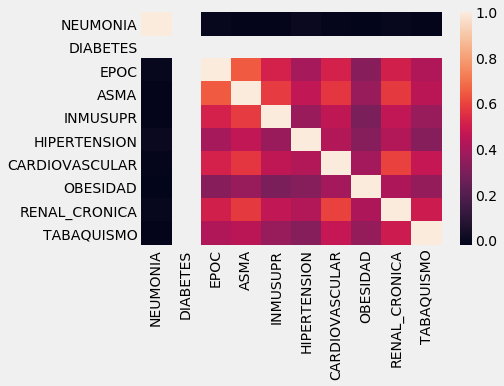

In [63]:
wcorr = DIABE.corr()
sns.heatmap(wcorr)

### EPOC

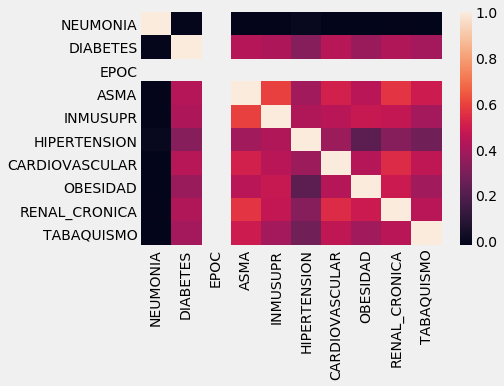

In [64]:
wcorr = EP.corr()
sns.heatmap(wcorr)